In [1]:
import json
import numpy as np
import requests

In [2]:
ids = {
    '49936078': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'wifi'},
    '49936077': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'wifi'},
    '49936076': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'wifi'},
    '49936075': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'wifi'},
    '49936074': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'wifi'},
    '49936073': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'wifi'},
    '49936072': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'wifi'},
    '49936071': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'wifi'},
    '49936070': {'host': 'us-east.azure.cloudharmony.net', 'type': 'wifi'},
    '49936069': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'wifi'},
    '49936068': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'wifi'},
    '49936004': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'lan'},
    '49936003': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'lan'},
    '49936002': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'lan'},
    '49936001': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'lan'},
    '49936000': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'lan'},
    '49935999': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'lan'},
    '49935998': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'lan'},
    '49935997': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'lan'},
    '49935996': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'lan'},
    '49935995': {'host': 'us-east.azure.cloudharmony.net', 'type': 'lan'},
    '49935994': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'lan'},
    '49936174': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'cellular'},
    '49936173': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'cellular'},
    '49936172': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'cellular'},
    '49936171': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'cellular'},
    '49936170': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'cellular'},
    '49936169': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'cellular'},
    '49936168': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'cellular'},
    '49936167': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'cellular'},
    '49936166': {'host': 'us-east.azure.cloudharmony.net', 'type': 'cellular'},
    '49936165': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'cellular'},
    '49936164': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'cellular'},
    '49936331': {'host': 'asia-east.azure.cloudharmony.net', 'type': 'satellite'},
    '49936330': {'host': 'asia-east2.gce.cloudharmony.net', 'type': 'satellite'},
    '49936329': {'host': 'ap-east-1.ec2.cloudharmony.net', 'type': 'satellite'},
    '49936328': {'host': 'uk-south.azure.cloudharmony.net', 'type': 'satellite'},
    '49936327': {'host': 'europe-west2.gce.cloudharmony.net', 'type': 'satellite'},
    '49936326': {'host': 'eu-west-2.ec2.cloudharmony.net', 'type': 'satellite'},
    '49936325': {'host': 'brazil-south.azure.cloudharmony.net', 'type': 'satellite'},
    '49936324': {'host': 'us-east.azure.cloudharmony.net', 'type': 'satellite'},
    '49936323': {'host': 'us-east4.gce.cloudharmony.net', 'type': 'satellite'},
    '49936322': {'host': 'australia-east.azure.cloudharmony.net', 'type': 'satellite'},
    '49936321': {'host': 'us-east-1.ec2.cloudharmony.net', 'type': 'satellite'},
}

In [3]:
data_centers = {
    'australia-east.azure.cloudharmony.net': ('Microsoft', 'OC', 'AU', 'Sydney', -33.8591, 151.2002),
    'brazil-south.azure.cloudharmony.net': ('Microsoft', 'SA', 'BR', 'Campinas', -22.9035, -47.0565),
    'eu-west-2.ec2.cloudharmony.net': ('Amazon EC2', 'EU', 'GB', 'London', 51.5164, -0.093),
    'europe-west2.gce.cloudharmony.net': ('Google', 'EU', 'GB', None, 51.5164, -0.093),
    'uk-south.azure.cloudharmony.net': ('Microsoft', 'EU', 'GB', 'London', 51.5164, -0.093),
    'ap-east-1.ec2.cloudharmony.net': ('Amazon EC2', 'AS', 'HK', 'Hong Kong', 22.25, 114.1667),
    'asia-east2.gce.cloudharmony.net': ('Google', 'AS', 'HK', 'Central', 22.2795, 114.146),
    'asia-east.azure.cloudharmony.net': ('Microsoft', 'AS', 'HK', 'Central', 22.2795, 114.146),
    'us-east-1.ec2.cloudharmony.net': ('Amazon EC2', 'NA', 'US', 'Ashburn', 39.0481, -77.4728),
    'us-east4.gce.cloudharmony.net': ('Google', 'NA', 'US', 'Washington', 38.8939, -77.0365),
    'us-east.azure.cloudharmony.net': ('Microsoft', 'NA', 'US', 'Washington', 38.7095, -78.1539),
}

def get_continent(id_list):
    continents = {}
    for id in id_list:
        continent = data_centers[ids[id]['host']][1]
        continents[id] = continent
    return continents

In [4]:
cellular_ids =  [key for key, value in ids.items() if value['type'] == 'cellular']
wifi_ids = [key for key, value in ids.items() if value['type'] == 'wifi']
lan_ids = [key for key, value in ids.items() if value['type'] == 'lan']
satellite_ids = [key for key, value in ids.items() if value['type'] == 'satellite']

cellular_continents = get_continent(cellular_ids)
wifi_continents = get_continent(wifi_ids)
lan_continents = get_continent(lan_ids)
satellite_continents = get_continent(satellite_ids)

print('Cellular continents:', cellular_continents)
print('WiFi continents:', wifi_continents)
print('LAN continents:', lan_continents)
print('Satellite continents:', satellite_continents)

Cellular continents: {'49936174': 'NA', '49936173': 'AS', '49936172': 'AS', '49936171': 'AS', '49936170': 'EU', '49936169': 'EU', '49936168': 'EU', '49936167': 'SA', '49936166': 'NA', '49936165': 'NA', '49936164': 'OC'}
WiFi continents: {'49936078': 'NA', '49936077': 'AS', '49936076': 'AS', '49936075': 'AS', '49936074': 'EU', '49936073': 'EU', '49936072': 'EU', '49936071': 'SA', '49936070': 'NA', '49936069': 'NA', '49936068': 'OC'}
LAN continents: {'49936004': 'NA', '49936003': 'AS', '49936002': 'AS', '49936001': 'AS', '49936000': 'EU', '49935999': 'EU', '49935998': 'EU', '49935997': 'SA', '49935996': 'OC', '49935995': 'NA', '49935994': 'NA'}
Satellite continents: {'49936331': 'AS', '49936330': 'AS', '49936329': 'AS', '49936328': 'EU', '49936327': 'EU', '49936326': 'EU', '49936325': 'SA', '49936324': 'NA', '49936323': 'NA', '49936322': 'OC', '49936321': 'NA'}


In [5]:
def request_data(measurement_id):
    # The URL to reach the measurement
    url = f"https://atlas.ripe.net/api/v2/measurements/{measurement_id}/results/?start=1676221335&stop=1676825715&format=json"

    # Make a request to the RIPE Atlas API to get the measurement results
    response = requests.get(url)
    data = json.loads(response.content)
    return data

In [6]:
def get_mean_latency(data):
    latency_arr = []
    for probe in data:        
        # Append the latenty data for each probe
        latency_arr += [result["rtt"] for result in probe["result"] if 'rtt' in result]
        
    # Calculate the mean of latencies
    mean_latency = sum(latency_arr) / len(latency_arr)  
    return mean_latency

# Calculate the mean for each type each continent
cellular_latencies = {}
wifi_latencies = {}
lan_latencies = {}
satellite_latencies = {}


for measurement_id, continent in cellular_continents.items():
    data = request_data(measurement_id)
    mean_latency = get_mean_latency(data)
    cellular_latencies[continent] = mean_latency
    
for measurement_id, continent in wifi_continents.items():
    data = request_data(measurement_id)
    mean_latency = get_mean_latency(data)
    wifi_latencies[continent] = mean_latency
    
for measurement_id, continent in lan_continents.items():
    data = request_data(measurement_id)
    mean_latency = get_mean_latency(data)
    lan_latencies[continent] = mean_latency
for measurement_id, continent in satellite_continents.items():
    data = request_data(measurement_id)
    mean_latency = get_mean_latency(data)
    satellite_latencies[continent] = mean_latency
    
print("Cellular latencies:", cellular_latencies)
print("Lan latencies:", lan_latencies)
print("Wifi latencies:", wifi_latencies)
print("Satellite latencies:", satellite_latencies)

    

Cellular latencies: {'NA': 146.71602534240284, 'AS': 261.82164701576187, 'EU': 86.93912543681354, 'SA': 257.52121165429764, 'OC': 273.7464257859145}
Lan latencies: {'NA': 125.47151408556297, 'AS': 235.1113603041158, 'EU': 69.86140579480423, 'SA': 228.8323872339641, 'OC': 226.84873992809582}
Wifi latencies: {'NA': 112.7824887682643, 'AS': 232.85973757742684, 'EU': 62.33581347758286, 'SA': 214.63058183631335, 'OC': 249.49224160597174}
Satellite latencies: {'AS': 250.04340564138607, 'EU': 129.70404223865933, 'SA': 228.0624505780581, 'NA': 120.9632495046969, 'OC': 112.36289142622479}


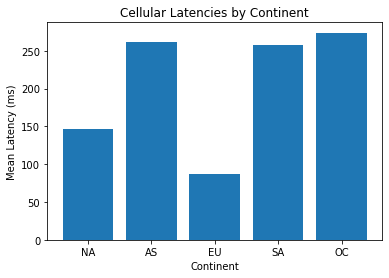

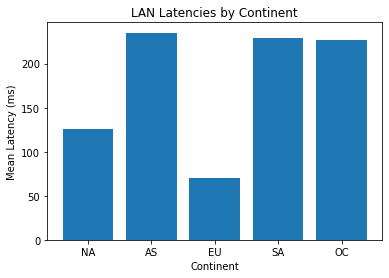

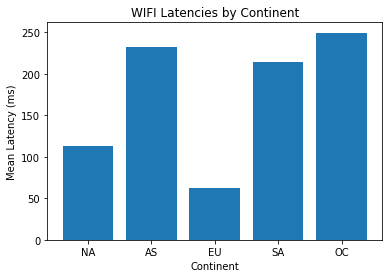

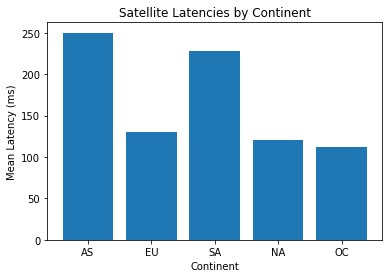

In [7]:
import matplotlib.pyplot as plt

def create_bar_chart_by_continent(latency_dict, latency_type):
    plt.bar(latency_dict.keys(), latency_dict.values())
    plt.title(f"{latency_type} Latencies by Continent")
    plt.xlabel("Continent")
    plt.ylabel("Mean Latency (ms)")
    plt.show()

create_bar_chart_by_continent(cellular_latencies, 'Cellular')
create_bar_chart_by_continent(lan_latencies, 'LAN')
create_bar_chart_by_continent(wifi_latencies, 'WIFI')
create_bar_chart_by_continent(satellite_latencies, 'Satellite')

In [8]:
def plot_latencies_by_continent(cellular, wifi, lan):
    for continent in cellular.keys():
        fig, ax = plt.subplots()
        ax.set_title(f"Latencies by Technology in {continent}")
        ax.bar(['Cellular', 'WiFi', 'LAN', 'Satellite'], [cellular[continent], wifi[continent], lan[continent], satellite[continent]])
        ax.set_ylabel("Latency (ms)")
        plt.show()

In [9]:
plot_latencies_by_continent(cellular_latencies, wifi_latencies, lan_latencies, satellite_latencies)

TypeError: plot_latencies_by_continent() takes 3 positional arguments but 4 were given